In [1]:
import pandas as pd
from langchain_core.documents import Document

In [2]:
# Extracting and parsing sources (stored as a list of Document objects in strings)
sources = pd.read_excel("../results/sources.xlsx")
dimensions = {
"uses_uses_sources",
"uses_data_limits_sources",
"uses_ml_approach_sources",
"uses_represents_people_sources",
"uses_biases_sources",
"uses_privacy_sources",
"uses_sensitivity_sources",
"uses_maintenance_policies_sources",
"collection_explanation_sources",
"collection_team_sources",
"collection_labour_sources",
"collection_team_demographic_sources",
"collection_target_demographics_sources",
"collection_speakers_demographics_sources",
"collection_sources_sources",
"collection_infrastructure_sources",
"annotation_explanation_sources",
"annotation_team_demographi_sources",
"annotation_infrastructure_sources",
"annotation_validation_methods_sources",
}
source_sections = []
# Loading raw data
rawData = pd.read_excel("../results/FullStudyAnalysis.xlsx", sheet_name="Raw Data")
# Joining sources to raw data
mergedData = rawData.merge(sources, on="doi")

# Creating the dimensions subsets from our overall raw data and by journals

In [3]:
# Subset by jorunal
mergedData_SD = mergedData.query("journal_x == 'SData'")
mergedData_Dbrief = mergedData.query("journal_x == 'DBrief'")
# Is using an ML approach
subsetML = mergedData.query("uses_ml_approach_bool == 'Yes'")
subsetML_SD = subsetML.query("journal_x == 'SData'")
subsetML_Dbrief = subsetML.query("journal_x == 'DBrief'")
# Use data limits
subsetLimits = mergedData.query("uses_data_limits.str.contains('Yes,*')")
subsetLimits_SD = subsetLimits.query("journal_x == 'SData'")
subsetLimits_Dbrief = subsetLimits.query("journal_x == 'DBrief'")
# Social Concerns subset
strng = "<class 'str'>"
subsetPeople = mergedData.query("uses_biases_bool != @strng")
subsetSocial = mergedData.query("uses_biases_bool == 'Yes'")
subsetSocial_SD = subsetSocial.query("journal_x == 'SData'")
subsetSocial_Dbrief = subsetSocial.query("journal_x == 'DBrief'")
# Collection team demographics
subsetCollectionTeam = mergedData.query("collection_team_demographic.str.contains('Yes,*')")
subsetCollectionTeam_SD = subsetCollectionTeam.query("journal_x == 'SData'")
subsetCollectionTeam_Dbrief = subsetCollectionTeam.query("journal_x == 'DBrief'")
# Collection target demographics
subsetCollectionTargetDemographics = mergedData.query("collection_target_demographics.str.contains('Yes,*',na=False)")
subsetCollectionTargetDemographics_SD = subsetCollectionTargetDemographics.query("journal_x == 'SData'")
subsetCollectionTargetDemographics_Dbrief = subsetCollectionTargetDemographics.query("journal_x == 'DBrief'")
# Collection speakers demographics
subsetCollectionSpeakersDemographics = mergedData.query("collection_speakers_demographics.str.contains('Yes,*',na=False)")
subsetCollectionSpeakersDemographics_SD = subsetCollectionSpeakersDemographics.query("journal_x == 'SData'")
subsetCollectionSpeakersDemographics_Dbrief = subsetCollectionSpeakersDemographics.query("journal_x == 'DBrief'")
# Annotation profile
subsetAnntationTeam = mergedData.query("annotation_team_demograaphic.str.contains('Yes,*',na=False)")
subsetAnntationTeam_SD = subsetAnntationTeam.query("journal_x == 'SData'")
subsetAnntationTeam_Dbrief = subsetAnntationTeam.query("journal_x == 'DBrief'")
# Annotation infrastructure
subsetAnntationInfrastructure = mergedData.query("annotation_infrastructure.str.contains('Yes,*',na=False)")
subsetAnntationInfrastructure_SD = subsetAnntationInfrastructure.query("journal_x == 'SData'")
subsetAnntationInfrastructure_Dbrief = subsetAnntationInfrastructure.query("journal_x == 'DBrief'")
# Annotation validation
subsetAnntationValidation = mergedData.query("annotation_validation_methods.str.contains('Yes,*',na=False)")
subsetAnntationValidation_SD = subsetAnntationValidation.query("journal_x == 'SData'")
subsetAnntationValidation_Dbrief = subsetAnntationValidation.query("journal_x == 'DBrief'")

# Extracting the sections of each chunk

In [4]:
çOLD!!!! 
def extract_sections(dataPapersList, dimension):
    sections = []
    for idx, papers in dataPapersList.iterrows():
        if  isinstance(papers[dimension],str):
            documents = eval(papers[dimension])
            for document in documents:
                    if dimension == "uses_uses_sources":
                        sections.insert(0,document[0].metadata['source'])
                    else:
                        sections.insert(0,document.metadata['source'])
    return sections

In [4]:
def extract_sections(dataPapersList, dimension):
    sections = []
    for idx, papers in dataPapersList.iterrows():
        if  isinstance(papers[dimension],str):
            documents = eval(papers[dimension])
            singlePaperSections = {"sections" : ""}
            for  document in documents:
                    if dimension == "uses_uses_sources":
                        singlePaperSections["sections"] = singlePaperSections["sections"] +" , " +  document[0].metadata['source']
                    else:
                        singlePaperSections["sections"] = singlePaperSections["sections"] +" , " + document.metadata['source']
            sections.append(singlePaperSections)
    return sections

## Section extraction; overall and by SD and Dbrief

In [7]:
# Uses
sectionsUses = extract_sections(mergedData,"uses_uses_sources")
sectionsUses_SD = extract_sections(mergedData_SD,"uses_uses_sources")
sectionsUses_DBrief = extract_sections(mergedData_Dbrief,"uses_uses_sources")
# MLapproach
sectionsMLapproach = extract_sections(subsetML,"uses_ml_approach_sources")
sectionsMLapproach_SD = extract_sections(subsetML_SD,"uses_ml_approach_sources")
sectionsMLapproach_DBrief = extract_sections(subsetML_Dbrief,"uses_ml_approach_sources")
# Limits
sectionsLimits = extract_sections(subsetLimits,"uses_data_limits_sources")
sectionsLimits_SD = extract_sections(subsetLimits_SD,"uses_data_limits_sources")
sectionsLimits_Dbrief = extract_sections(subsetLimits_Dbrief,"uses_data_limits_sources")
# Social
sectionsSocial = extract_sections(subsetSocial,"uses_biases_sources")
sectionsSocial_SD = extract_sections(subsetSocial_SD,"uses_biases_sources")
sectionsSocial_DBrief = extract_sections(subsetSocial_Dbrief,"uses_biases_sources")
# Collection
sectionsCollection = extract_sections(mergedData,"collection_explanation_sources")
sectionsCollection_SD = extract_sections(mergedData_SD,"collection_explanation_sources")
sectionsCollection_Dbrief = extract_sections(mergedData_Dbrief,"collection_explanation_sources")
# Col Team
sectionsColTeam = extract_sections(subsetCollectionTeam,"collection_team_demographic_sources")
sectionsColTeam_SD = extract_sections(subsetCollectionTeam_SD,"collection_team_demographic_sources")
sectionsColTeam_Dbrief = extract_sections(subsetCollectionTeam_Dbrief,"collection_team_demographic_sources")
# Col target
sectionsColTarget = extract_sections(subsetCollectionTargetDemographics,"collection_target_demographics_sources")
sectionsColTarget_SD = extract_sections(subsetCollectionTargetDemographics_SD,"collection_target_demographics_sources")
sectionsColTarget_Dbrief = extract_sections(subsetCollectionTargetDemographics_Dbrief,"collection_target_demographics_sources")
# Speakrs demo
sectionsSpeech = extract_sections(subsetCollectionSpeakersDemographics,"collection_speakers_demographics_sources")
sectionsSpeech_SD = extract_sections(subsetCollectionSpeakersDemographics_SD,"collection_speakers_demographics_sources")
sectionsSpeech_Dbrief = extract_sections(subsetCollectionSpeakersDemographics_Dbrief,"collection_speakers_demographics_sources")


# Col Sources
sectionsCollectionSources = extract_sections(mergedData,"collection_sources_sources")
sectionsCollectionSources_SD = extract_sections(mergedData_SD,"collection_sources_sources")
sectionsCollectionSources_Dbrief = extract_sections(mergedData_Dbrief,"collection_sources_sources")
# Annotation
sectionsAnnotation = extract_sections(mergedData,"annotation_explanation_sources")
sectionsAnnotation_SD = extract_sections(mergedData_SD,"annotation_explanation_sources")
sectionsAnnotation_Dbrief = extract_sections(mergedData_Dbrief,"annotation_explanation_sources")

# Annotation team
sectionsAnnTeam = extract_sections(subsetAnntationTeam,"annotation_team_demographi_sources")
sectionsAnnTeam_SD = extract_sections(subsetAnntationTeam_SD,"annotation_team_demographi_sources")
sectionsAnnTeam_Dbrief = extract_sections(subsetAnntationTeam_Dbrief,"annotation_team_demographi_sources")

# Annotation infrastructure
sectionsAnnInfr = extract_sections(subsetAnntationInfrastructure,"annotation_infrastructure_sources")
sectionsAnnInfr_SD = extract_sections(subsetAnntationInfrastructure_SD,"annotation_infrastructure_sources")
sectionsAnnInfr_Dbrief = extract_sections(subsetAnntationInfrastructure_Dbrief,"annotation_infrastructure_sources")

# Annotation Validation
sectionsAnnVal = extract_sections(subsetAnntationValidation,"annotation_validation_methods_sources")
sectionsAnnVal_SD = extract_sections(subsetAnntationValidation_SD,"annotation_validation_methods_sources")
sectionsAnnVal_Dbrief = extract_sections(subsetAnntationValidation_Dbrief,"annotation_validation_methods_sources")

Calculating the counts of SData

In [109]:
def countsSData(subset):
    df = pd.DataFrame(subset)
    row = {}
    row["Background & Summary"] = (df.query("sections.str.contains('Background')").shape[0])/df.shape[0]
    row["Methods"] = (df.query("sections.str.contains('Methods ')").shape[0])/df.shape[0]
    row["Data records"] = (df.query("sections.str.contains('Data Records') or sections.str.contains('Data records')").shape[0])/df.shape[0]
    row["Technical validation"] = (df.query("sections.str.contains('technical Validation') or sections.str.contains('Technical Validation') ").shape[0])/df.shape[0]
    row["Usage notes"] = (df.query("sections.str.contains('Usage Notes') or sections.str.contains('Usage notes') ").shape[0])/df.shape[0]
    row["Authors contribution"] = (df.query("sections.str.contains('Author Contribution') or sections.str.contains('Author contributions') or sections.str.contains('author contributions') ").shape[0])/df.shape[0]
    row["Code availability"] = (df.query("sections.str.contains('Code availability') or sections.str.contains('Code Availability') ").shape[0])/df.shape[0]

    return row

SDataResults = []
# Uses
SDataResults.append(countsSData(extract_sections(mergedData_SD,"uses_uses_sources")))
# MLapproach
SDataResults.append(countsSData(extract_sections(subsetML_SD,"uses_ml_approach_sources")))
# Limits
SDataResults.append(countsSData(extract_sections(subsetLimits_SD,"uses_data_limits_sources")))
# Social
SDataResults.append(countsSData(extract_sections(subsetSocial_SD,"uses_biases_sources")))
# Collection
SDataResults.append(countsSData(extract_sections(mergedData_SD,"collection_explanation_sources")))
# Col Team
SDataResults.append(countsSData(extract_sections(subsetCollectionTeam_SD,"collection_team_demographic_sources")))
# Col target
SDataResults.append(countsSData(extract_sections(subsetCollectionTargetDemographics_SD,"collection_target_demographics_sources")))
#Speech
SDataResults.append(countsSData(extract_sections(subsetCollectionSpeakersDemographics_SD,"collection_speakers_demographics_sources")))
# Col Sources
SDataResults.append(countsSData(extract_sections(mergedData_SD,"collection_sources_sources")))
# Annotation
SDataResults.append(countsSData(extract_sections(mergedData_SD,"annotation_explanation_sources")))
# Annotation team
SDataResults.append(countsSData(extract_sections(subsetAnntationTeam_SD,"annotation_team_demographi_sources")))
# Annotation infrastructure
SDataResults.append(countsSData(extract_sections(subsetAnntationInfrastructure_SD,"annotation_infrastructure_sources")))
# Annotation Validation
SDataResults.append(countsSData(extract_sections(subsetAnntationValidation_SD,"annotation_validation_methods_sources")))

SDataResultspd = pd.DataFrame(SDataResults).round(3).mul(100)
row_names = {
             0:'Recommended uses',
             1:'Tested using ML approach',
             2:'Generalization limits',
             3:'Social concerns',
             4:'Collection Description',
             5:'Profile collection team',
             6: 'Profile collection target',
             7:'Speech context',
             8: 'Sources & infrastructure',
             9:'Annotation description',
             10: 'Annotation profile',
             11: 'Annotation infrastructure',
             12: 'Annotation validation'  
            }
SDataResultspd = SDataResultspd.rename(index = row_names)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

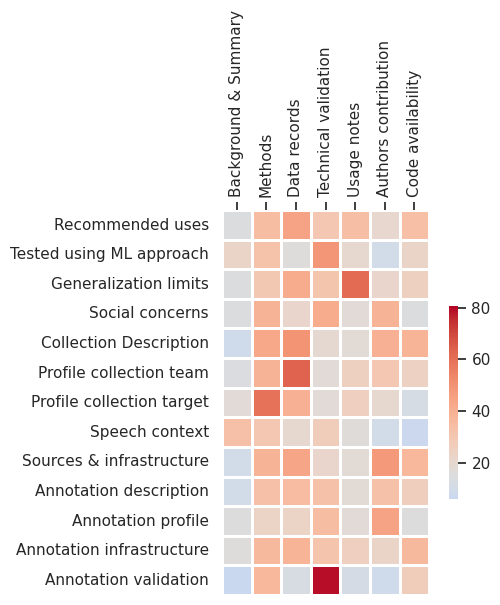

In [121]:
sns.set_theme(style="white")

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 40, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
#ax.xaxis.set_label_position('top')
g = sns.heatmap(SDataResultspd, cmap="coolwarm", vmax=80.5, center=15,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})




Calculating the counts of DBrief

In [111]:
def countsDBrief(subset):
    df = pd.DataFrame(subset)
    row = {}
    row["Specifications table"] = (df.query("sections.str.contains('Specifications Table')").shape[0])/df.shape[0]
    row["Experimental design"] = (df.query("sections.str.contains('Experimental design, materials, and methods')").shape[0])/df.shape[0]
    row["Data description"] = (df.query("sections.str.contains('Data description')").shape[0])/df.shape[0]
    row["Value of the data"] = (df.query("sections.str.contains('Value of the data')").shape[0])/df.shape[0]
    return row

dBriefResults = []
# Uses
dBriefResults.append(countsDBrief(extract_sections(mergedData_Dbrief,"uses_uses_sources")))
# MLapproach
dBriefResults.append(countsDBrief(extract_sections(subsetML_Dbrief,"uses_ml_approach_sources")))
# Limits
dBriefResults.append(countsDBrief(extract_sections(subsetLimits_Dbrief,"uses_data_limits_sources")))
# Social
dBriefResults.append(countsDBrief(extract_sections(subsetSocial_Dbrief,"uses_biases_sources")))
# Collection
dBriefResults.append(countsDBrief(extract_sections(mergedData_Dbrief,"collection_explanation_sources")))
# Col Team
dBriefResults.append(countsDBrief(extract_sections(subsetCollectionTeam_Dbrief,"collection_team_demographic_sources")))
# Col target
dBriefResults.append(countsDBrief(extract_sections(subsetCollectionTargetDemographics_Dbrief,"collection_target_demographics_sources")))
# Speakers
dBriefResults.append(countsDBrief(extract_sections(subsetCollectionSpeakersDemographics_Dbrief,"collection_speakers_demographics_sources")))
# Col Sources
dBriefResults.append(countsDBrief(extract_sections(mergedData_Dbrief,"collection_sources_sources")))
# Annotation
dBriefResults.append(countsDBrief(extract_sections(mergedData_Dbrief,"annotation_explanation_sources")))
# Annotation team
dBriefResults.append(countsDBrief(extract_sections(subsetAnntationTeam_Dbrief,"annotation_team_demographi_sources")))
# Annotation infrastructure
dBriefResults.append(countsDBrief(extract_sections(subsetAnntationInfrastructure_Dbrief,"annotation_infrastructure_sources")))
# Annotation Validation
dBriefResults.append(countsDBrief(extract_sections(subsetAnntationValidation_Dbrief,"annotation_validation_methods_sources")))

DbriefResultspd = pd.DataFrame(dBriefResults).round(3).mul(100)
row_names = {
             0:'Recommended uses',
             1:'Tested using ML approach',
             2:'Generalization limits',
             3:'Social concerns',
             4:'Collection Description',
             5:'Profile collection team',
             6: 'Profile collection target',
             7:'Speech context',
             8: 'Sources & infrastructure',
             9:'Annotation description',
             10: 'Annotation profile',
             11: 'Annotation infrastructure',
             12: 'Annotation validation'  
            }

DbriefResultspd = DbriefResultspd.rename(index = row_names)

<Axes: >

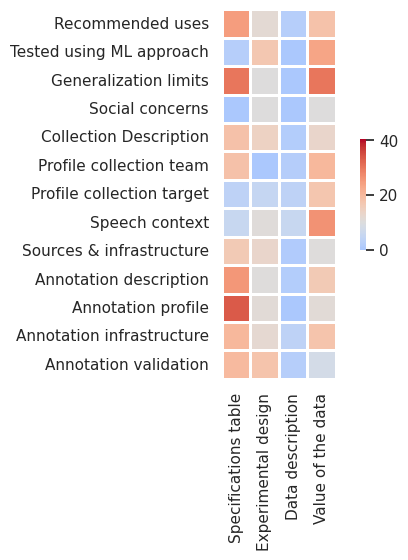

In [117]:

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 40, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(DbriefResultspd, cmap="coolwarm", vmax=40.5, center=10,
            square=True, linewidths=.8, cbar_kws={"shrink": .3})
# Draw the heatmap with the mask and correct aspect ratio


## NOT USED

In [25]:
import transformers

classifier = transformers.pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
sdataRequiredSections = [
"Title",
"Abstract",
"Background & Summary",
"Methods",
"Data Records",
"Technical Validation",
"Usage Notes",
"Code Availability",
"References",
"Author Contributions",
"Competing Interests"
]

/home/joangi/sites/DataPaperAnalysis/DataPaperAnalysis/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [26]:
def classifyLabels(sections):
    finalSections = []
    for idx , section in enumerate(sections):
        if section:
            resultClass  = classifier(section, sdataRequiredSections)
            if resultClass['scores'][0] > 0.4:
                print("changed")
                sections[idx] = resultClass['labels'][0]
            # save the result
    return finalSections

In [35]:
counts = pd.DataFrame(sectionsUses_SD).value_counts()
counts.to_excel("sectionCounts.xlsx", sheet_name="Uses")

# Uses
countsUses = pd.DataFrame(extract_sections(mergedData,"uses_uses_sources")).value_counts()
countsUses_SD = pd.DataFrame(extract_sections(mergedData_SD,"uses_uses_sources")).value_counts()
countsUses_DBrief = pd.DataFrame(extract_sections(mergedData_Dbrief,"uses_uses_sources")).value_counts()

# MLapproach
countsMLapproach = pd.DataFrame(extract_sections(subsetML,"uses_ml_approach_sources")).value_counts()
countsMLapproach_SD = pd.DataFrame(extract_sections(subsetML_SD,"uses_ml_approach_sources")).value_counts().to_excel("mlapproaches.xlsx")
countsMLapproach_Dbrief = pd.DataFrame(extract_sections(subsetML_Dbrief,"uses_ml_approach_sources")).value_counts()

# Limits
countsLimits = pd.DataFrame(extract_sections(subsetLimits,"uses_data_limits_sources")).value_counts()
countsLimits_SD = pd.DataFrame(extract_sections(subsetLimits_SD,"uses_data_limits_sources")).value_counts().to_excel("limits.xlsx")
countsLimits_Dbrief = pd.DataFrame(extract_sections(subsetLimits_Dbrief,"uses_data_limits_sources")).value_counts()

# Social
countsSocial = pd.DataFrame(extract_sections(subsetSocial,"uses_biases_sources")).value_counts()
countsSocial_SD = pd.DataFrame(extract_sections(subsetSocial_SD,"uses_biases_sources")).value_counts().to_excel("bias.xlsx")
countsSocial_Dbrief = pd.DataFrame(extract_sections(subsetSocial_Dbrief,"uses_biases_sources")).value_counts()

# Collection
countsCollection = pd.DataFrame(extract_sections(mergedData,"collection_explanation_sources")).value_counts()
countsCollection_SD = pd.DataFrame(extract_sections(mergedData_SD,"collection_explanation_sources")).value_counts().to_excel("collection.xlsx")
countsCollection_Dbrief = pd.DataFrame(extract_sections(mergedData_Dbrief,"collection_explanation_sources")).value_counts()
# Col Team
countsColTeam = pd.DataFrame(extract_sections(subsetCollectionTeam,"collection_team_demographic_sources")).value_counts()
countsColTeam_SD = pd.DataFrame(extract_sections(subsetCollectionTeam_SD,"collection_team_demographic_sources")).value_counts().to_excel("colteam.xlsx")
countsColTeam_Dbrief = pd.DataFrame(extract_sections(subsetCollectionTeam_Dbrief,"collection_team_demographic_sources")).value_counts()
# Col target
countsColTarget = pd.DataFrame(extract_sections(subsetCollectionTargetDemographics,"collection_target_demographics_sources")).value_counts()
countsColTarget_SD = pd.DataFrame(extract_sections(subsetCollectionTargetDemographics_SD,"collection_target_demographics_sources")).value_counts().to_excel("target.xlsx")
countsColTarget_Dbrief = pd.DataFrame(extract_sections(subsetCollectionTargetDemographics_Dbrief,"collection_target_demographics_sources")).value_counts()
# Col speakers
countsSpeakersTarget = pd.DataFrame(extract_sections(subsetCollectionSpeakersDemographics,"collection_speakers_demographics_sources")).value_counts()
countsSpeakersTarget_SD = pd.DataFrame(extract_sections(subsetCollectionSpeakersDemographics_SD,"collection_speakers_demographics_sources")).value_counts().to_excel("speakers.xlsx")
countsSpeakersTarget_Dbrief = pd.DataFrame(extract_sections(subsetCollectionSpeakersDemographics_Dbrief,"collection_speakers_demographics_sources")).value_counts()
# Col Sources
countsCollectionSources = pd.DataFrame(extract_sections(mergedData,"collection_sources_sources")).value_counts()
countsCollectionSources_SD = pd.DataFrame(extract_sections(mergedData_SD,"collection_sources_sources")).value_counts().to_excel("sources.xlsx")
countsCollectionSources_Dbrief = pd.DataFrame(extract_sections(mergedData_Dbrief,"collection_sources_sources")).value_counts()
# Annotation
countsAnnotation = pd.DataFrame(extract_sections(mergedData,"annotation_explanation_sources")).value_counts()
countsAnnotation_SD = pd.DataFrame(extract_sections(mergedData_SD,"annotation_explanation_sources")).value_counts().to_excel("annotation.xlsx")
countsAnnotation_Dbrief = pd.DataFrame(extract_sections(mergedData_Dbrief,"annotation_explanation_sources")).value_counts()

# Annotation team
countsAnnTeam = pd.DataFrame(extract_sections(subsetAnntationTeam,"annotation_team_demographi_sources")).value_counts()
countsAnnTeam_SD = pd.DataFrame(extract_sections(subsetAnntationTeam_SD,"annotation_team_demographi_sources")).value_counts().to_excel("anoteam.xlsx")
countsAnnTeam_Dbrief = pd.DataFrame(extract_sections(subsetAnntationTeam_Dbrief,"annotation_team_demographi_sources")).value_counts()

# Annotation infrastructure
countsAnnInfr =  pd.DataFrame(extract_sections(subsetAnntationInfrastructure,"annotation_infrastructure_sources")).value_counts()
countssectionsAnnInfr_SD =  pd.DataFrame(extract_sections(subsetAnntationInfrastructure_SD,"annotation_infrastructure_sources")).value_counts().to_excel("anoinfra.xlsx")
countsAnnInfr_Dbrief =  pd.DataFrame(extract_sections(subsetAnntationInfrastructure_Dbrief,"annotation_infrastructure_sources")).value_counts()

# Annotation Validation
countsAnnVal = pd.DataFrame(extract_sections(subsetAnntationValidation,"annotation_validation_methods_sources")).value_counts()
countsAnnVal_SD = pd.DataFrame(extract_sections(subsetAnntationValidation_SD,"annotation_validation_methods_sources")).value_counts().to_excel("anoVali.xlsx")
countsAnnVal_Dbrief = pd.DataFrame(extract_sections(subsetAnntationValidation_Dbrief,"annotation_validation_methods_sources")).value_counts()

In [ ]:
sectionMLApproach_SD_clean = classifyLabels(sectionsMLapproach_SD)
#sectionsMLapproach
#sectionsMLapproach_SD
#sectionsMLapproach_DBrief

In [ ]:
countsSDUsesClassified = pd.DataFrame(classifyLabels(extract_sections(mergedData,"uses_uses_sources"))).value_counts()
countsSDMLapproachClassified = pd.DataFrame(classifyLabels(extract_sections(subsetML,"uses_ml_approach_sources"))).value_counts()
countsSDLimitsClassified = pd.DataFrame(classifyLabels(extract_sections(subsetLimits,"uses_data_limits_sources"))).value_counts()
countsSDSocialClassified = pd.DataFrame(classifyLabels(extract_sections(subsetSocial,"uses_biases_sources"))).value_counts()
countsSDCollectionClassified = pd.DataFrame(classifyLabels(extract_sections(mergedData,"collection_explanation_sources"))).value_counts()
countsSDColTeamClassified = pd.DataFrame(classifyLabels(extract_sections(subsetCollectionTeam,"collection_team_demographic_sources"))).value_counts()
countsSDColTargetClassified = pd.DataFrame(classifyLabels(extract_sections(subsetCollectionTargetDemographics,"collection_target_demographics_sources"))).value_counts()
countsSDCollectionSourcesClassified = pd.DataFrame(classifyLabels(extract_sections(mergedData,"collection_sources_sources"))).value_counts()
countsSDAnnotationClassified = pd.DataFrame(classifyLabels(extract_sections(mergedData,"annotation_explanation_sources"))).value_counts()
countsSDAnnTeamClassified = pd.DataFrame(classifyLabels(extract_sections(subsetAnntationTeam,"annotation_team_demographi_sources"))).value_counts()
countsSDAnnInfrClassified = pd.DataFrame(classifyLabels(extract_sections(subsetAnntationInfrastructure,"annotation_infrastructure_sources"))).value_counts()
countsSDAnnValClassified = pd.DataFrame(classifyLabels(extract_sections(subsetAnntationValidation,"annotation_validation_methods_sources"))).value_counts()